In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from sklearn.mixture import GaussianMixture
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from mpl_toolkits.basemap import Basemap
import xarray as xr

/var/folders/x6/3ksd31kd0qlb8vzxm4gl87gr0000gn/T/ipykernel_4121/2639406355.py:52: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap2 = get_cmap('PuRd', 6)      # column 2 palette
/var/folders/x6/3ksd31kd0qlb8vzxm4gl87gr0000gn/T/ipykernel_4121/2639406355.py:54: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap3 = get_cmap('viridis', 6)   # column 3 palette


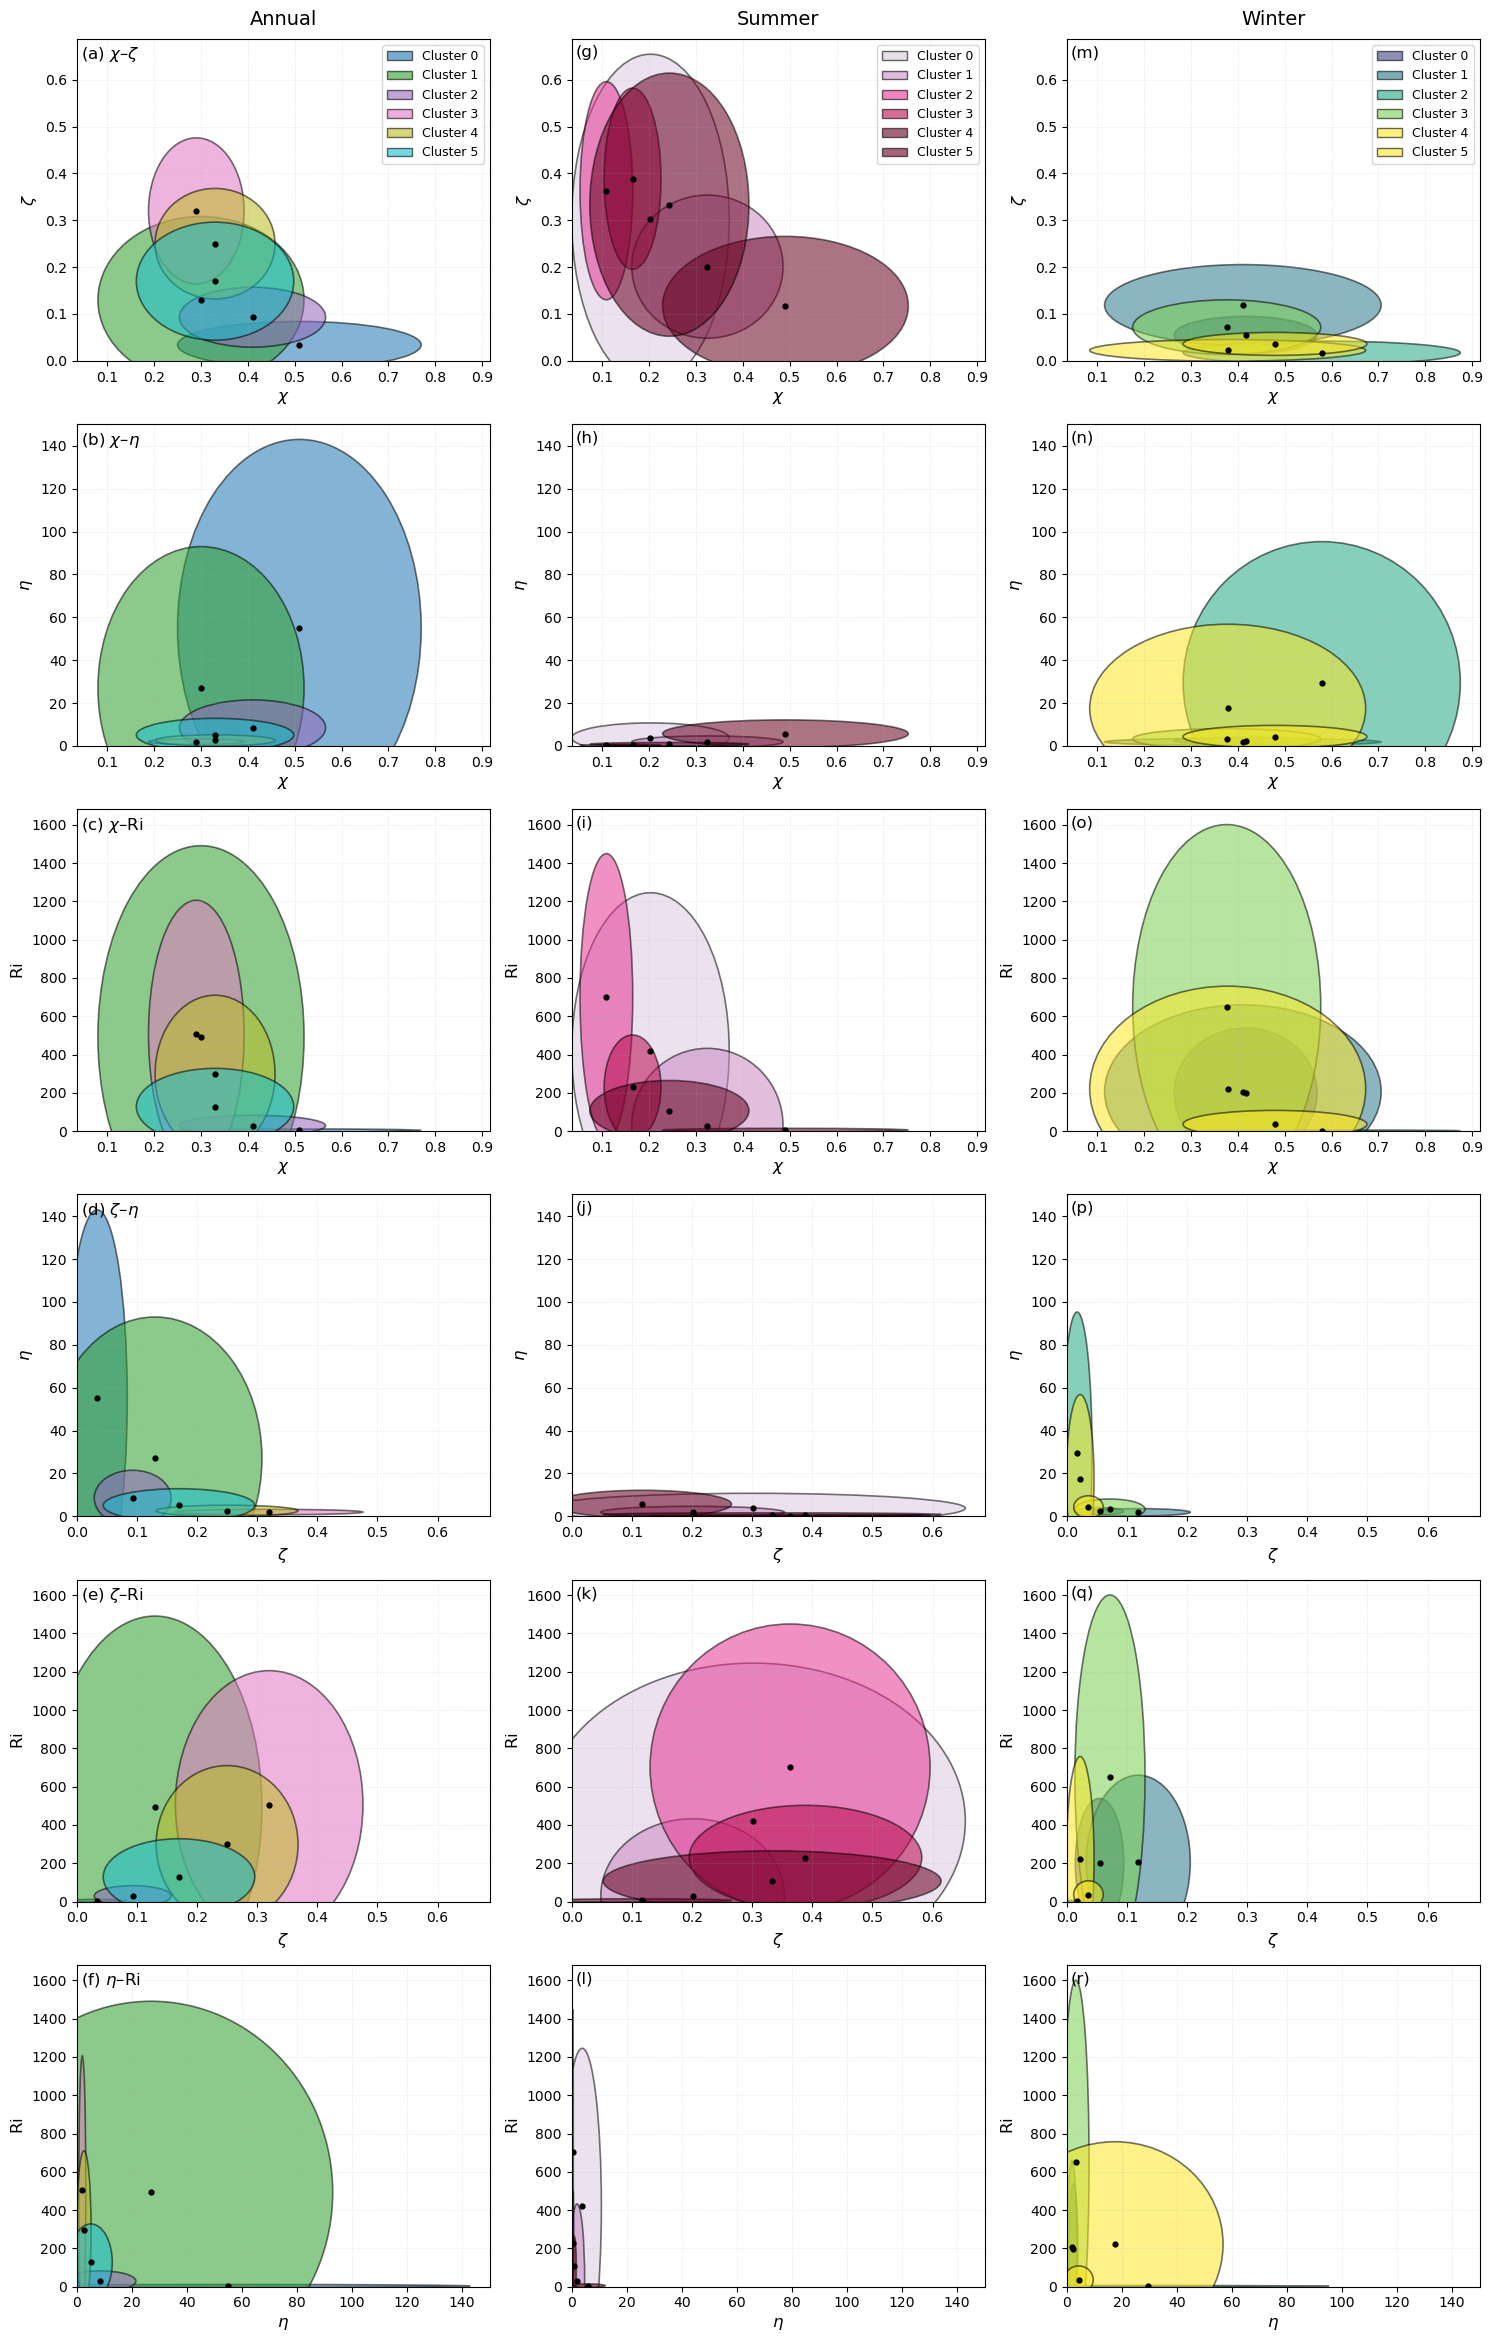

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Patch
from matplotlib.cm import get_cmap

# -------------------------
# Data blocks (unchanged)
# -------------------------
datasets = {
    "Annual": {
        "chi":  np.array([0.51, 0.3, 0.41, 0.29, 0.33, 0.33]),
        "chi_std": np.array([0.13, 0.11, 0.078, 0.051, 0.064, 0.084]),
        "J":   np.array([0.21, 1.43, 0.71, 3.3, 2.4, 1.6]),
        "J_std": np.array([0.16, 1.07, 0.20, 0.49, 0.33, 0.43]),
        "zeta": np.array([0.034, 0.13, 0.093, 0.32, 0.25, 0.17]),
        "zeta_std": np.array([0.025, 0.089, 0.032, 0.078, 0.059, 0.063]),
        "eta":  np.array([55., 27., 8.5, 2.0, 2.6, 5.1]),
        "eta_std": np.array([44., 33., 6.5, 0.64, 1.3, 3.9]),
        "Ri":   np.array([3.7, 493., 29., 506., 298., 128.]),
        "Ri_std": np.array([4., 499., 27., 350., 206., 100.]),
    },
    "Summer": {
        "chi":  np.array([0.202906, 0.324405, 0.108742, 0.164700, 0.490976, 0.243191]),
        "chi_std": np.array([0.084000, 0.080717, 0.028133, 0.030375, 0.131131, 0.084893]),
        "J":   np.array([5.112298, 1.946227, 10.456760, 7.422752, 0.770258, 4.312972]),
        "J_std": np.array([3.450434, 0.531128, 1.685156, 1.212134, 0.480091, 1.162513]),
        "zeta": np.array([0.302114, 0.201015, 0.363091, 0.388679, 0.117169, 0.333318]),
        "zeta_std": np.array([0.176207, 0.076369, 0.116428, 0.096761, 0.074230, 0.140466]),
        "eta":  np.array([3.800863, 1.918484, 0.396986, 0.502242, 5.730796, 0.862994]),
        "eta_std": np.array([3.476398, 1.382374, 0.073048, 0.107609, 3.219894, 0.394830]),
        "Ri":   np.array([420.386902, 29.025956, 702.083719, 229.675038, 5.728447, 106.918182]),
        "Ri_std": np.array([412.429318, 201.74542, 373.802496, 136.376882, 4.542006, 78.924332]),
    },
    "Winter": {
        "chi":  np.array([0.416496, 0.410784, 0.579077, 0.376276, 0.378327, 0.479271]),
        "chi_std": np.array([0.076221, 0.147587, 0.147901, 0.100358, 0.147254, 0.098121]),
        "J":   np.array([0.408315, 0.963058, 0.089509, 0.600347, 0.196059, 0.236057]),
        "J_std": np.array([0.124273, 0.295142, 0.053378, 0.179923, 0.103707, 0.058653]),
        "zeta": np.array([0.054500, 0.118932, 0.017220, 0.071806, 0.022244, 0.036054]),
        "zeta_std": np.array([0.020164, 0.043235, 0.012461, 0.029167, 0.011536, 0.012254]),
        "eta":  np.array([2.383882, 1.898404, 29.474347, 3.305865, 17.509660, 4.329715]),
        "eta_std": np.array([0.838592, 0.859448, 32.924129, 2.394488, 19.639958, 2.636700]),
        "Ri":   np.array([199.554663, 206.780471, 2.003867, 651.080629, 221.781899, 36.199290]),
        "Ri_std": np.array([169.443159, 226.597836, 2.089411, 475.074592, 267.786218, 36.127294]),
    }
}

# -------------------------
# Palettes (column-specific)
# -------------------------
palette_col0 = ['#1f77b4', '#2ca02c', '#9467bd', '#e377c2', '#bcbd22', '#17becf']  # matches your map
cmap2 = get_cmap('PuRd', 6)      # column 2 palette
palette_col1 = [cmap2(i) for i in range(1, 7)]
cmap3 = get_cmap('viridis', 6)   # column 3 palette
palette_col2 = [cmap3(i) for i in range(1, 7)]
col_palettes = {0: palette_col0, 1: palette_col1, 2: palette_col2}

# -------------------------
# Plotting setup
# -------------------------
# LaTeX math symbols (normal, not bold)
symbol_map = {
    'chi':  r'$\chi$',
    'zeta': r'$\zeta$',
    'eta':  r'$\eta$',
    'Ri':   r'$\mathrm{Ri}$',
    'J':    r'$J$'
}

pairs = [('chi','zeta'), ('chi','eta'), ('chi','Ri'),
         ('zeta','eta'), ('zeta','Ri'), ('eta','Ri')]
seasons = list(datasets.keys())  # ['Annual','Summer','Winter']
n_clusters = 6

# Annual row labels with pair names (non-bold)
annual_row_labels = [
    r'(a) $\chi$–$\zeta$',
    r'(b) $\chi$–$\eta$',
    r'(c) $\chi$–$\mathrm{Ri}$',
    r'(d) $\zeta$–$\eta$',
    r'(e) $\zeta$–$\mathrm{Ri}$',
    r'(f) $\eta$–$\mathrm{Ri}$'
]

# Letters for Summer (g–l) and Winter (m–r)
letters = [chr(ord('a') + i) for i in range(18)]  # a..r
label_grid = {
    1: [f'({letters[i]})' for i in range(6, 12)],   # g–l
    2: [f'({letters[i]})' for i in range(12, 18)]   # m–r
}

# ----- global limits per pair (±2σ), then clamp at 0 -----
limits = []
for xvar, yvar in pairs:
    xmin_list, xmax_list, ymin_list, ymax_list = [], [], [], []
    for season in seasons:
        d = datasets[season]
        x, xs = d[xvar], d[f'{xvar}_std']
        y, ys = d[yvar], d[f'{yvar}_std']
        xmin_list.append(np.min(x - 2*xs)); xmax_list.append(np.max(x + 2*xs))
        ymin_list.append(np.min(y - 2*ys)); ymax_list.append(np.max(y + 2*ys))

    xmin, xmax = min(xmin_list), max(xmax_list)
    ymin, ymax = min(ymin_list), max(ymax_list)

    # Clamp at 0 so only positive values show
    xmin = max(0.0, xmin)
    ymin = max(0.0, ymin)

    # keep a little padding
    dx = max(xmax - xmin, 1e-6)
    dy = max(ymax - ymin, 1e-6)
    limits.append((xmin, xmin + 1.05*dx, ymin, ymin + 1.05*dy))

# -------------------------
# Draw: 6 rows × 3 cols
# -------------------------
fig, ax = plt.subplots(6, 3, figsize=(15, 24), constrained_layout=False)

for col, season in enumerate(seasons):
    d = datasets[season]
    palette = col_palettes[col]

    # column titles
    ax[0, col].set_title(season, fontsize=14, pad=10)

    for row, (xvar, yvar) in enumerate(pairs):
        a = ax[row, col]
        xvals, yvals = d[xvar], d[yvar]
        xstds, ystds = d[f'{xvar}_std'], d[f'{yvar}_std']

        # ellipses (4σ) + centers
        for k in range(n_clusters):
            e = Ellipse((xvals[k], yvals[k]),
                        width=4*xstds[k], height=4*ystds[k],
                        angle=0, linewidth=1.2, fill=True,
                        fc=palette[k], alpha=0.55, ec='k')
            a.add_patch(e)
            a.plot(xvals[k], yvals[k], marker='o', ms=3.5, lw=0, color='k')

        # axis labels (math symbols) and limits
        a.set_xlabel(symbol_map.get(xvar, xvar), fontsize=12)
        a.set_ylabel(symbol_map.get(yvar, yvar), fontsize=12)
        xmin, xmax, ymin, ymax = limits[row]
        a.set_xlim(xmin, xmax)
        a.set_ylim(ymin, ymax)

        a.tick_params(labelsize=10)
        a.grid(True, alpha=0.25, linestyle='--', linewidth=0.5)

        # subplot labels:
        if col == 0:
            # Annual: (a)-(f) with pair names
            a.text(0.01, 0.98, annual_row_labels[row],
                   transform=a.transAxes, ha='left', va='top', fontsize=12)
        else:
            # Summer (g–l) and Winter (m–r): letters only
            a.text(0.01, 0.98, label_grid[col][row],
                   transform=a.transAxes, ha='left', va='top', fontsize=12)

# Legends for each column
for col, palette in col_palettes.items():
    legend_elements = [Patch(facecolor=palette[k], edgecolor='k', alpha=0.6, label=f'Cluster {k}')
                       for k in range(n_clusters)]
    ax[0, col].legend(handles=legend_elements, loc='upper right', fontsize=9, frameon=True)

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()
